# Form to string

In [1]:
import pandas as pd

## Loading icebreakers_extract.csv as a pandas dataframe

In [2]:
df = pd.read_csv("./data/icebreakers_extract.csv")
df

,title,price,questions,advisor_id,deleted_at,user_skill_id,preview_media_url,icebreaker_type,allow_quantity,share_allowed_org,share_allowed_platform,description,locale,icebreaker_translations
0,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":92540555320,""body"":{""body"":""What is you...",1,NaN,2,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
1,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":81797796808,""body"":{""body"":""What is you...",1,NaN,2,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
2,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":38078152200,""body"":{""body"":""What is you...",1,NaN,2,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
3,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":35844159078,""body"":{""body"":""What is you...",1,NaN,8,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
4,Financial Recovery Aid Applications,NaN,"[{""id"":10699678759,""body"":{""body"":""What is you...",1,NaN,39,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3


### Droping irrelevant columns¶

In [3]:
to_drop = ['advisor_id', 
           'deleted_at', 
           'user_skill_id', 
           'preview_media_url', 
           'icebreaker_type', 
           'allow_quantity', 
           'share_allowed_org', 
           'share_allowed_platform', 
           'locale', 
           'icebreaker_translations',
          'price']

df.drop(columns=to_drop, inplace=True)
df

,title,questions,description
0,Return Journey Planning - Eligibility & Legal ...,"[{""id"":92540555320,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
1,Return Journey Planning - Eligibility & Legal ...,"[{""id"":81797796808,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
2,Return Journey Planning - Eligibility & Legal ...,"[{""id"":38078152200,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
3,Return Journey Planning - Eligibility & Legal ...,"[{""id"":35844159078,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
4,Financial Recovery Aid Applications,"[{""id"":10699678759,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...


#### for a comparison of row 0 vs 1 vs 2 vs 3, kindly see `protoype_data_analysis_&_agent_development.ipynb` -> *initial comparison of question dicts*

Questions and answers are the same, ids etc can be d/f.

#### Form - Return Journey Planning - Eligibility & Legal Requirements

In [72]:
import json
import re

string_form = ""
question_number = 0
skip            = False
for i in json.loads(df['questions'][0]):
    question_number+=1
    current_string  = i['body']['body']

    if question_number>=18:
        current_string  = re.sub(r'\s*\(PII\)', '', current_string)
        current_list    = re.split(r'[:|]', current_string)
        current_list[0] = "Q" + str(question_number) + ": " + current_list[0] + ' (PII) ' + '?'
        skip            = True

    if skip == False:
        current_list    = re.split(r'[:|]', current_string)
        current_list[0] = "Q" + str(question_number) + ": " + current_list[0] + '?'
    for i,j in enumerate(current_list):
        if i!=0:
            # removing the first white space
            current_list[i] = current_list[i][1:]
            current_list[i] = str(i) + '. ' + current_list[i]
            
        string_form = string_form + current_list[i] + '\n'
        # print(current_list[i])
    string_form+='\n\n'
    # print()




In [79]:
# print(string_form)

In [74]:
# # Save to a text file
# with open("return_journey_planning_eligibility_nd_legal_requirements.txt", "w", encoding="utf-8") as f:
#     f.write(string_form)


In [ ]:
# Q6
# Abmeldung in Germany means deregistering your address when you move out or leave the country.
# You must inform the local office (Bürgeramt or Einwohnermeldeamt) that you no longer live at your German address.
# Afterward, you get a deregistration certificate, which helps you cancel contracts, insurance, or services.
# This should be done shortly before or within about two weeks after leaving your home in Germany.


#### Form - 'Financial Recovery Aid Applications'

In [77]:
import json
import re

string_form = ""
question_number = 0
skip            = False
for i in json.loads(df['questions'][4]):
    question_number+=1
    current_string  = i['body']['body']

    if question_number>=23:
        current_string  = re.sub(r'\s*\(PII\)', '', current_string)
        current_list    = re.split(r'[:|]', current_string)
        current_list[0] = "Q" + str(question_number) + ": " + current_list[0] + ' (PII) ' + '?' + '\n' + '1.'
        skip            = True

    if skip == False:
        current_list    = re.split(r'[:|]', current_string)
        current_list[0] = "Q" + str(question_number) + ": " + current_list[0] + '?'
    for i,j in enumerate(current_list):
        if i!=0:
            # removing the first white space
            current_list[i] = current_list[i][1:]
            current_list[i] = str(i) + '. ' + current_list[i]
            
        string_form = string_form + current_list[i] + '\n'
        # print(current_list[i])
    string_form+='\n\n'
    # print()




In [78]:
# print(string_form)

Q1: What is your current monthly income from all sources?
1. Less than €500 
2. €500-€1,000 
3. €1,000-€1,500 
4. €1,500-€2,000 
5. More than €2,000 
6. Prefer not to say


Q2: How has your financial situation changed since arriving in Germany?
1. Much worse than in Ukraine 
2. Somewhat worse 
3. About the same 
4. Somewhat better 
5. Much better


Q3: Are you currently receiving German social benefits?
1. Yes, Bürgergeld 
2. Yes, other benefits 
3. Applied but waiting 
4. No, not eligible 
5. No, haven't applied 
6. Not sure


Q4: What are your biggest monthly expenses right now?
1. Housing 
2. Food 
3. Healthcare 
4. Childcare 
5. Transportation 
6. Debt payments 
7. Remittances to family 
8. Other


Q5: Do you currently have access to banking services in Germany?
1. Yes, full banking account 
2. Yes, basic account 
3. Limited access 
4. No, but trying to get access 
5. No, prefer not to use banks


Q6: Did you own property or a business in Ukraine?
1. Yes, residential property 
2. Y

In [69]:
# # Save to a text file
# with open("financial_recovery_aid_applications.txt", "w", encoding="utf-8") as f:
#     f.write(string_form)


# Agent Development

In [10]:
from langgraph.graph import START, END, MessagesState, StateGraph
from langchain_core.runnables import RunnableConfig
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langchain_google_genai import ChatGoogleGenerativeAI

# from core import get_model, settings

import os
from dotenv import load_dotenv
load_dotenv()

# Access API keys and credentials
OPENAI_API_KEY    = os.environ["OPENAI_API_KEY"]
GEMINI_API_KEY    = os.environ["GEMINI_API_KEY"]
# TIMESCALE_DB_URI  = os.environ["TIMESCALE_DB_URI"]
# MAIN_AGENT_DB_URI = os.environ["MAIN_AGENT_DB_URI"]
# TAVILY_API_KEY    = os.environ["TAVILY_API_KEY"]




class AgentState(MessagesState, total=False):
    """`total=False` marks fields added here as optional (PEP 589),
    while inherited fields (like `messages` from MessagesState) keep their original requirements.

    documentation: https://typing.readthedocs.io/en/latest/spec/typeddict.html#totality
    """
    # # Safety metadata from LlamaGuard (populated by guard nodes)
    # safety: LlamaGuardOutput

    # # LangGraph-managed remaining step budget for the current run
    # remaining_steps: RemainingSteps


MODEL_SYSTEM_MESSAGE = """ You are a helpful chatbot ...

<context>
{context}
</context>
"""


context = 'context'


async def acall_model(state: AgentState, config: RunnableConfig) -> AgentState:
    """Main model node:
       - Selects the concrete model (from config or default),
       - Runs the tool-enabled chat model,
       - Post-checks the output with LlamaGuard,
       - Enforces step budget if tool calls remain."""
    
    # # can later decide to pace it outside the fn, if observed high latency in traces
    # model      = get_model(config["configurable"].get("model", settings.DEFAULT_MODEL))
    # model = ChatOpenAI(model="gpt-4.1-nano-2025-04-14", temperature=0, max_tokens=1000)

    # latency is way lower than openai
    model = ChatGoogleGenerativeAI(
        model       = "gemini-2.0-flash-lite",
        api_key     = GEMINI_API_KEY,          # make it of tyoe secret key when wrapping in fastapi
        temperature = 0,
        max_tokens  = 1000
    )

    
    system_msg = MODEL_SYSTEM_MESSAGE.format(context=context)
    response   = await model.ainvoke(
                                        [SystemMessage(content=system_msg)] + state["messages"],
                                        config=config
                                    )
    
    return {"messages": [response]}

# -------------------------
# BUILD THE GRAPH
# -------------------------

builder = StateGraph(AgentState)

builder.add_node("acall_model", acall_model)
builder.set_entry_point("acall_model")
builder.add_edge('acall_model', END)

# Compile with an in-memory checkpointer; resume by calling invoke() on the same thread_id
checkpointer = MemorySaver()

# Compile the graph with persistent checkpointer and in-memory store
graph = builder.compile(checkpointer=checkpointer)# store=across_thread_memory)

    

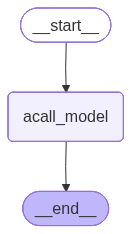

In [11]:
from IPython.display import Image, display
# View
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except:
    print(graph.get_graph().draw_ascii(), '\n\n')
    print(graph.get_graph().draw_mermaid())


In [12]:
cfg = {"configurable": {"user_id":'1', "thread_id": '1'}}

text=HumanMessage(content='what was my name?')
# Kick off (provide initial state once)
output = await graph.ainvoke({"messages": [text]}, cfg)
for msg in output['messages']:
    msg.pretty_print()


================================ Human Message =================================

what was my name?
================================== Ai Message ==================================

I do not have access to your name. I am a language model, and I do not retain information from previous conversations.
